In [106]:
!pwd
%cd /Users/henrycousins/gits/nxviz
!ls




/Users/henrycousins/gits/nxviz
/Users/henrycousins/gits/nxviz
ChG-Miner_miner-chem-gene.tsv drugbank.tsv
LICENSE                       nxjiggle.py
README.md                     test_jiggle.ipynb
__pycache__                   uniprotid_maps.txt


In [ ]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from nxjiggle import *

In [119]:
# import os
# import numpy as np
# import pandas as pd
# import glob as glob
# import matplotlib.pyplot as plt
# # import scipy.stats
# # import seaborn as sns
# # from sklearn import metrics as skm
# import math
# from collections import Counter
# import networkx as nx
# import matplotlib.lines as mlines
# from itertools import combinations
# import matplotlib

# def create_bboxes(pos, text_scale = 14):
#     node_bboxes = {}
#     for node in list(pos.keys()):
#         xy = pos[node]
#         x = xy[0]
#         y = xy[1]
#         bbox_length = len(node) * text_scale / 1000
#         bbox_height = 2 * text_scale / 1000
#         bbox = np.array([(x-bbox_length/2,y-bbox_height/2),bbox_length, bbox_height])
#         node_bboxes[node] = bbox
#     return node_bboxes

# def visualize(subG, pos, node_bboxes, title):
#     fig, ax = plt.subplots()
#     fig.set_figheight(15)
#     fig.set_figwidth(15)

#     nodelabels = dict([(x,x) for x in subG.nodes(data=False)])

#     min_x = min([node_bboxes[x][0][0] for x in node_bboxes.keys()])
#     min_y = min([node_bboxes[x][0][1] for x in node_bboxes.keys()])

#     nx.draw_networkx_labels(subG, pos, labels=nodelabels, ax=ax)

#     for node in list(node_bboxes.keys()):
#         bbox = node_bboxes[node]
#         rect = matplotlib.patches.Rectangle(bbox[0],
#                                             bbox[1],
#                                             bbox[2],
#                                             edgecolor = 'black',
#                                             fill=False)
#         ax.add_patch(rect)

#     ax.set_xlim(min_x,-min_x)
#     ax.set_ylim(min_y,-min_y)

#     plt.title(title)
    
#     plt.show()


# def calculate_overlap(node1, node2, node_bboxes):

#     bbox1 = node_bboxes[node1]
#     bbox2 = node_bboxes[node2]

#     xmin1 = bbox1[0][0]
#     ymin1 = bbox1[0][1]
#     xmax1 = xmin1 + bbox1[1]
#     ymax1 = ymin1 + bbox1[2]

#     xmin2 = bbox2[0][0]
#     ymin2 = bbox2[0][1]
#     xmax2 = xmin2 + bbox2[1]
#     ymax2 = ymin2 + bbox2[2]

#     dx = min(xmax1,xmax2) - max(xmin1,xmin2)
#     dy = min(ymax1,ymax2) - max(ymin1,ymin2)

#     if (dx < 0) | (dy < 0):
#         return 0
#     else:
#         return dx*dy

# def calculate_total_overlap(node_bboxes):
#     all_pairs = [x for x in combinations(list(node_bboxes.keys()),2)]
#     total_overlap = 0
#     node_bboxes = node_bboxes ##
#     for pair in all_pairs:
#         overlap = calculate_overlap(pair[0], pair[1], node_bboxes)
#         total_overlap += overlap
#     return total_overlap

# def calculate_node_overlap(node_bboxes):
#     node_list = list(node_bboxes.keys())
#     node_overlap_dict = {}
#     for node in node_list:
#         node_overlap = 0
#         for othernode in node_list:
#             if node != othernode:
#                 node_overlap += calculate_overlap(node, othernode, node_bboxes)
#         node_overlap_dict[node] = node_overlap
#     return node_overlap_dict

# def jiggle(node_bboxes, node_overlap_dict, scale):
#     node_list = list(node_bboxes.keys())
#     new_node_bboxes = {}
#     for node in node_list:
#         bbox = node_bboxes[node]
#         overlap = node_overlap_dict[node]
#         dx = (np.random.randn()*overlap + np.random.randn()*0.00001) * scale
#         dy = (np.random.randn()*overlap + np.random.randn()*0.00001) * scale
#         new_bbox = np.array([(bbox[0][0]+dx, bbox[0][1]+dy), bbox[1], bbox[2]])
#         new_node_bboxes[node] = new_bbox
#     return new_node_bboxes

# def bbox2pos(bbox):
#     return (bbox[0][0]+bbox[1]/2, bbox[0][1]+bbox[2]/2)

# def bboxes2pos(node_bboxes):
#     new_pos = {}
#     for node in list(node_bboxes.keys()):
#         xy = bbox2pos(node_bboxes[node])
#         new_pos[node] = xy
#     return new_pos

# def fit_jiggle(node_bboxes, num_iter = 500, scale=100):
    
#     overlap_hist = []

#     best_node_bboxes = node_bboxes

#     for i in range(num_iter):

#         current_node_overlap = calculate_total_overlap(best_node_bboxes) # current total overlap
#         overlap_hist.append(current_node_overlap)

#         node_overlap_dict = calculate_node_overlap(best_node_bboxes) # current overlap per node
#         new_node_bboxes = jiggle(best_node_bboxes, node_overlap_dict, scale=scale) # make new bboxes

#         new_node_overlap = calculate_total_overlap(new_node_bboxes) # new total overlap

#         print(f'Iteration {i}, current overlap {current_node_overlap}, new overlap {new_node_overlap}')

#         if new_node_overlap < current_node_overlap:
#             best_node_bboxes = new_node_bboxes
#             print(f'*** Saving better version ***')

#         if new_node_overlap <= 0:
#             break

#     return best_node_bboxes, overlap_hist


# def main_jiggle(G, pos, text_scale = 14, num_iter = 500, scale=100):

#     # Make bboxes
#     node_bboxes = create_bboxes(pos, text_scale = text_scale)

#     # Check that they look correct
#     visualize(G, pos, node_bboxes, 'Before fitting:')

#     # Fit a jiggle
#     new_node_bboxes, overlap_hist = fit_jiggle(node_bboxes, num_iter = num_iter, scale=scale)

#     print('Finished fitting.')

#     # Convert back to node positions
#     new_pos = bboxes2pos(new_node_bboxes)

#     # Inspect new bboxes
#     visualize(G, new_pos, new_node_bboxes, 'After fitting:')

#     # Plot training history
#     plt.figure()
#     plt.plot([x for x in range(len(overlap_hist))], overlap_hist)
#     plt.xlabel('Iteration')
#     plt.ylabel('Overlap')
#     plt.show()

#     return new_pos

Name: 
Type: Graph
Number of nodes: 212
Number of edges: 189
Average degree:   1.7830


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


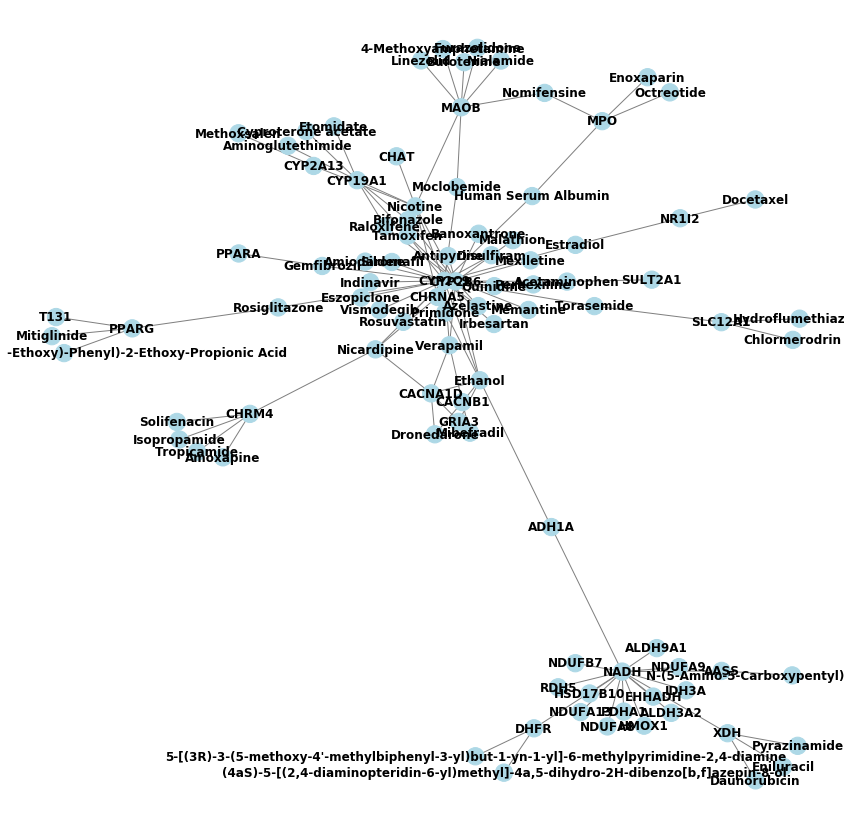

In [120]:
# Load example drug-gene graph

genemap = pd.read_csv('uniprotid_maps.txt',sep='\t')
genemapdict = {}
for i in genemap.index:
  src = genemap.From.loc[i]
  tgt = genemap.To.loc[i]
  genemapdict[src] = tgt

drugbank = pd.read_csv('drugbank.tsv',sep='\t')
drugmapdict = {}
for i in drugbank.index:
  src = drugbank.drugbank_id.loc[i]
  tgt = drugbank.name.loc[i]
  drugmapdict[src] = tgt

miner = pd.read_csv('ChG-Miner_miner-chem-gene.tsv',sep='\t').rename(columns={'#Drug':'drug','Gene':'gene'})
miner = miner.drop(index=13541)
miner = miner[miner.drug.isin(list(drugmapdict.keys()))]

miner['genename'] = miner.gene.apply(lambda x: genemapdict[x])
miner['drugname'] = miner.drug.apply(lambda x: drugmapdict[x])
miner = miner[['genename','drugname']]
miner.drop_duplicates(inplace=True)


G = nx.Graph()

all_compounds = list(set(miner.drugname))
all_targets = list(set(miner.genename))
positive_nodes = all_compounds + all_targets

G.add_nodes_from(positive_nodes)

positive_edges = [tuple(miner.loc[i]) for i in miner.index]
positive_edges = list(filter(lambda a: a != ('genename', 'drugname'), positive_edges))
G.add_edges_from(positive_edges)



node_types = dict(list(zip(all_compounds + all_targets, 
                           [{'type':x} for x in ['compound' for x in all_compounds] + ['target' for x in all_targets]]
                           )))

nx.set_node_attributes(G,node_types)

types = nx.get_node_attributes(G, 'type')



# Smaller subgraph

subnodes = list(G.nodes)[0::10]
subG = G.subgraph(subnodes).copy()
# print(nx.info(subG))

isolates = list(nx.isolates(subG))
subG.remove_nodes_from(isolates)
print(nx.info(subG))

subG = subG.subgraph(max(nx.connected_components(subG), key=len)).copy()


pos = nx.spring_layout(subG, seed=0)




fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
nx.draw(subG, with_labels=True, pos=pos, ax=ax,
        node_color=['lightblue' for node in subG.nodes],
        edge_color=['gray' for edge in subG.edges],
        font_weight = 'bold')
plt.show()


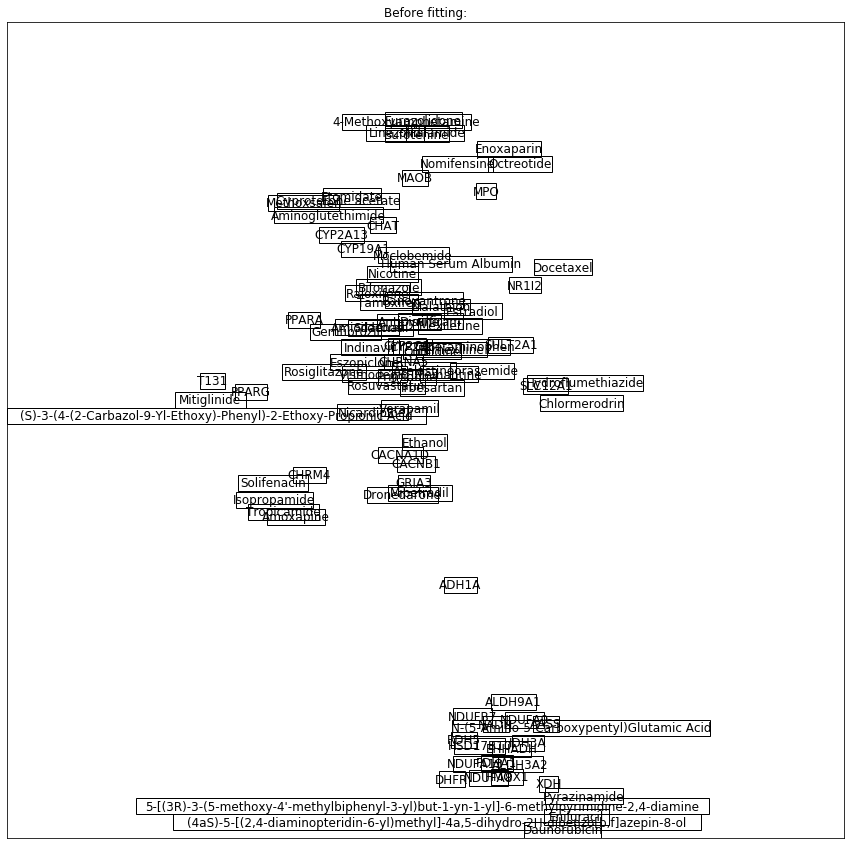

Iteration 0, current overlap 0.257375898141712, new overlap 0.26078179898566795
Iteration 1, current overlap 0.257375898141712, new overlap 0.19850076954542514
*** Saving better version ***
Iteration 2, current overlap 0.19850076954542514, new overlap 0.1407242681968443
*** Saving better version ***
Iteration 3, current overlap 0.1407242681968443, new overlap 0.10489549037676595
*** Saving better version ***
Iteration 4, current overlap 0.10489549037676595, new overlap 0.08826698670525006
*** Saving better version ***
Iteration 5, current overlap 0.08826698670525006, new overlap 0.12233705296523528
Iteration 6, current overlap 0.08826698670525006, new overlap 0.08981409691036074
Iteration 7, current overlap 0.08826698670525006, new overlap 0.07359517282502406
*** Saving better version ***
Iteration 8, current overlap 0.07359517282502406, new overlap 0.04895789716737123
*** Saving better version ***
Iteration 9, current overlap 0.04895789716737123, new overlap 0.0796430591019937
Iterati

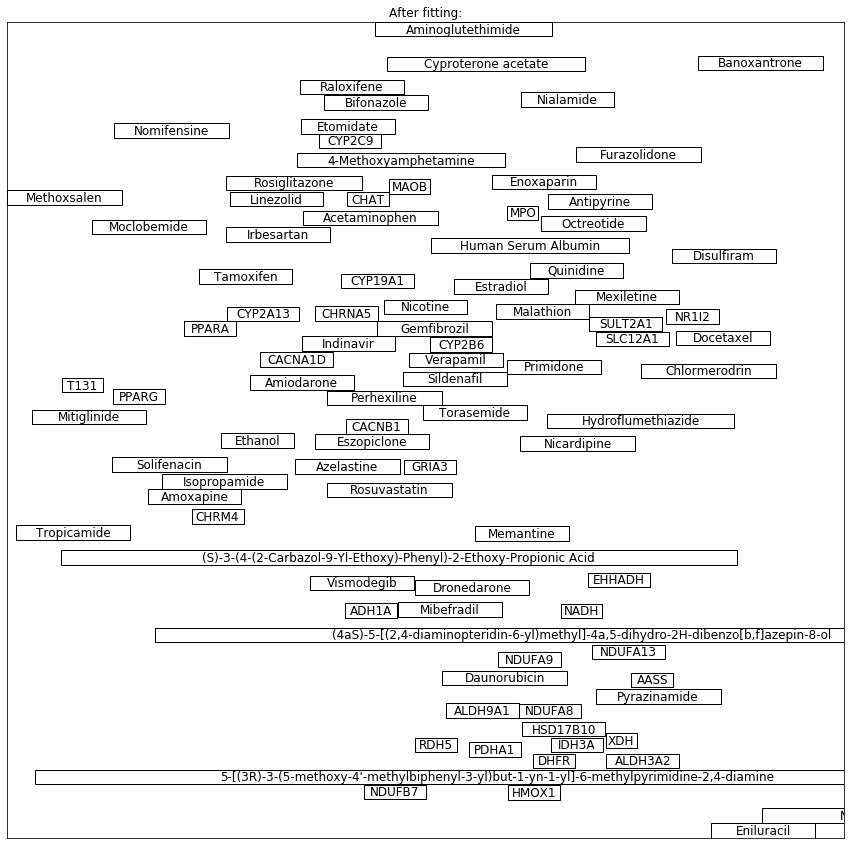

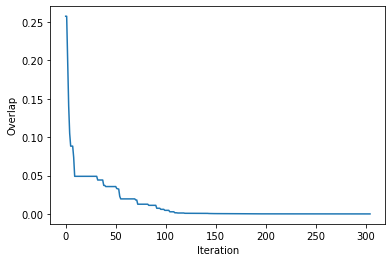

In [121]:
# from nxjiggle import *

new_pos = main_jiggle(subG, pos, text_scale = 20, num_iter = 1000, scale = 15)




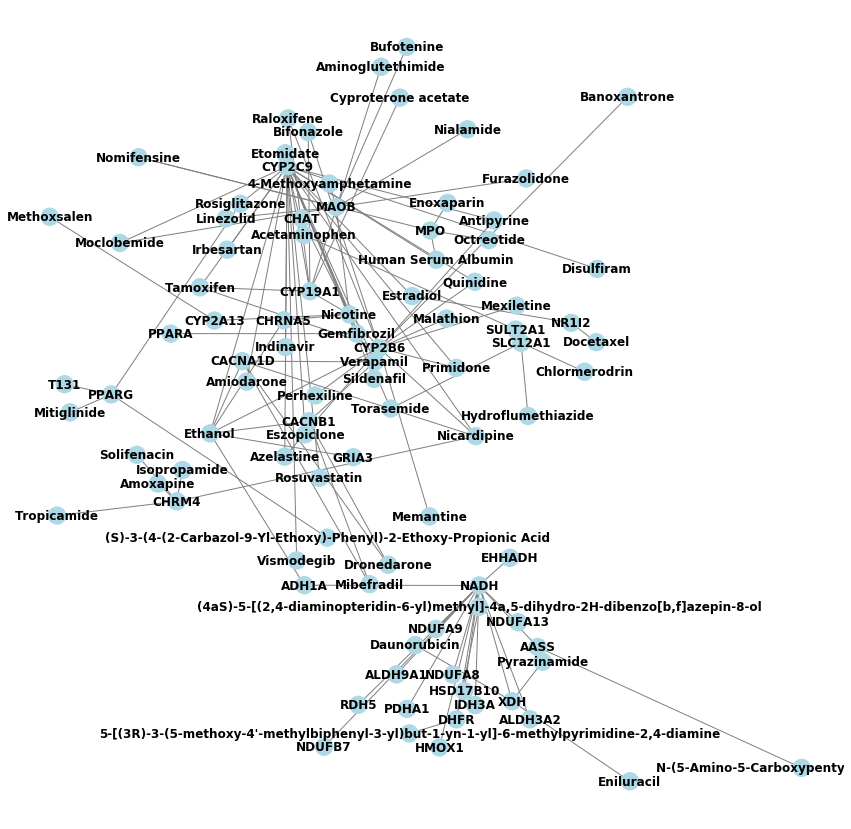

In [122]:

fig, ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)
nx.draw(subG, 
        pos=new_pos, 
        ax=ax, 
        with_labels=True, 
        node_color=['lightblue' for node in subG.nodes],
        edge_color=['gray' for edge in subG.edges],
        font_weight='bold'
        )
plt.show()




In [111]:
# import networkx as nx

# G = nx.Graph()


# G.add_edge('DolphinDolphinDolphinDolphinDolphinDolphin', 'Triceratops')
# G.add_edge('Triceratops', 'PterodactylPterodactylPterodactylPterodactyl')
# G.add_edge('PterodactylPterodactylPterodactylPterodactyl', 'DolphinDolphinDolphinDolphinDolphinDolphin')
# G.add_edge('Wombat', 'DolphinDolphinDolphinDolphinDolphinDolphin')
# G.add_edge('Triceratops', 'Wombat')
# G.add_edge('DolphinDolphinDolphinDolphinDolphinDolphin', 'Kangaroo')

# pos = nx.spring_layout(G)

# nx.draw(G, with_labels=True, pos=pos)

In [112]:
# main_jiggle(G, pos)
